[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


     NO        Place  Reaction  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                             Comment Unnamed: 4 Unnamed: 5  \
0  I am coming to the borders and I will kill you...        NaN        NaN   
1  im getting on borderlands and i will kill you ...        NaN        NaN   
2  im coming on borderlands and i will murder you...        NaN        NaN   
3  im getting on borderlands 2 and i will murder ...        NaN        NaN   
4  im getting into borderlands and i can murder y...        NaN        NaN   

  Unnamed: 6  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
Index(['NO', 'Place', 'Reaction', 'Comment', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6'],
      dtype='object')
NO                0
Place             0
Reaction          0
Comment         686
Unnamed: 4    74621
Unnamed: 5    74628

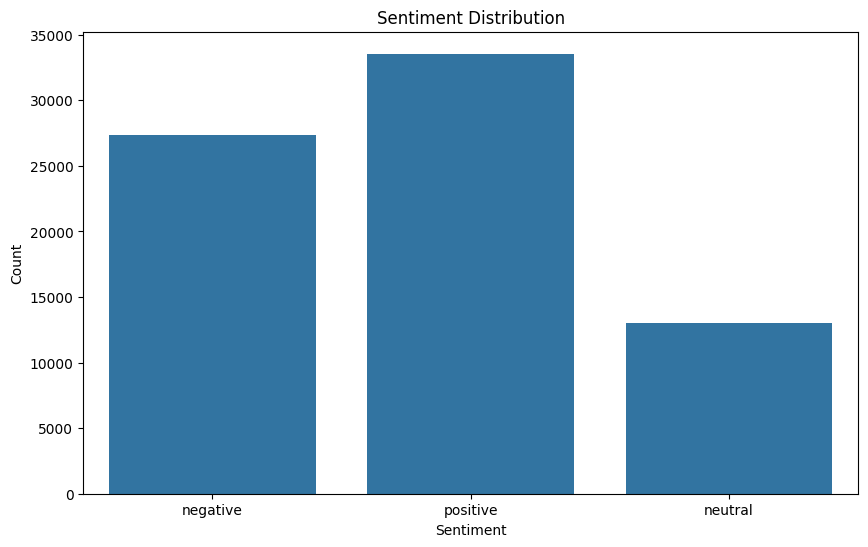

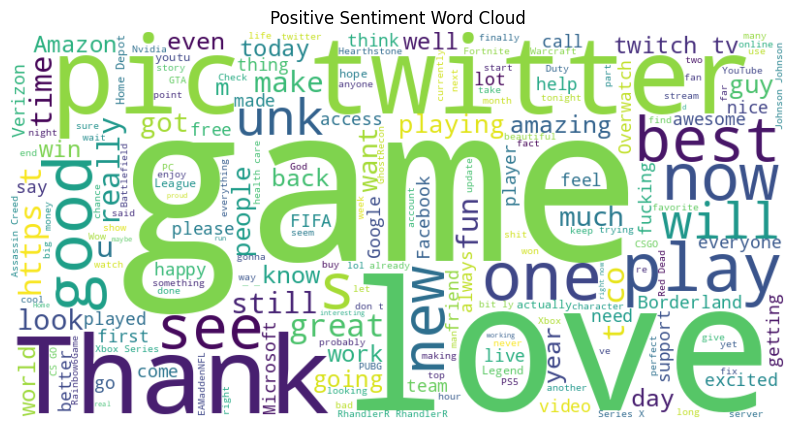

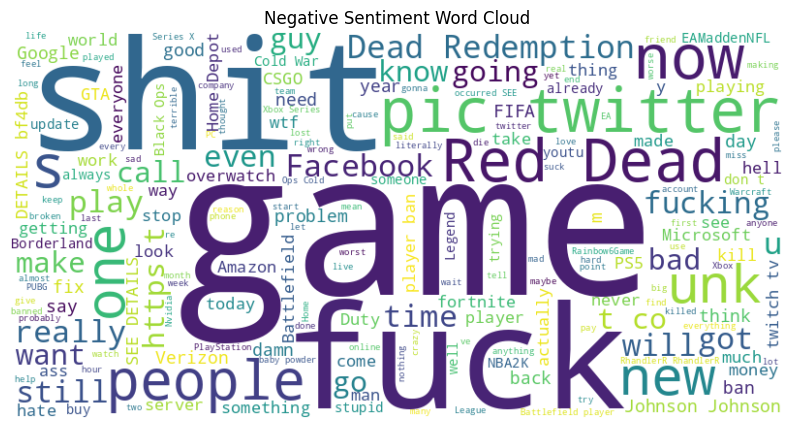

In [ ]:
# Install Necessary Libraries
!pip install pandas numpy matplotlib seaborn nltk textblob wordcloud

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import nltk
from wordcloud import WordCloud

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the dataset

data = pd.read_csv('/content/finaltask4.csv', encoding='latin1')

# Display the first few rows of the dataset
print(data.head())

# Display the column names of the dataset
print(data.columns)

# Identify the correct column for text data
text_column = 'Comment'  # Replace 'text' with the correct column name if different

# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values for simplicity (you can handle missing data in other ways too)
data = data.dropna(subset=[text_column])

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment
def get_sentiment(text):
    score = sia.polarity_scores(text)
    return score['compound']

# Apply sentiment analysis
data['sentiment'] = data[text_column].apply(get_sentiment)

# Classify sentiment
data['sentiment_class'] = data['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_class', data=data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


# Word cloud for positive sentiment
positive_text = ' '.join(data[data['sentiment_class'] == 'positive'][text_column])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud')
plt.show()

# Word cloud for negative sentiment
negative_text = ' '.join(data[data['sentiment_class'] == 'negative'][text_column])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud')
plt.show()
